# **IMporting** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import operator


from collections import Counter
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading** **Dataset**

In [4]:
dataset=pd.read_csv('/content/drive/My Drive/TA_restaurants_curated.csv')
dataset.head()
dataset=dataset.drop(['Unnamed: 0'],axis=1)
dataset.head(2)

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419


Removing Columns


In [5]:
dataset=dataset.drop(['URL_TA','ID_TA'],axis=1)
dataset.head(2)

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."


In [6]:
old_column_name = list(dataset.columns)
new_column_name = []
for i in range(dataset.shape[1]):
    word = dataset.columns[i].lower()
    word = re.sub(' ', '_', word)
    new_column_name.append(word)

print('old_column_name: ', old_column_name)
print('\nnew_column_name: ', new_column_name)




# Rename the dataset columns
for i in range(len(old_column_name)):
    dataset = dataset.rename(columns={old_column_name[i] : new_column_name[i]})
dataset.head(2)

old_column_name:  ['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range', 'Number of Reviews', 'Reviews']

new_column_name:  ['name', 'city', 'cuisine_style', 'ranking', 'rating', 'price_range', 'number_of_reviews', 'reviews']


,name,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."


# **Target** **column**

In [0]:
y=dataset['rating']

# **Daata** **Preprocessing**

## **EDA**

 **NULL** **VALUES**

In [8]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values-
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4)*100,'% missing value')

cuisine_style 24.98 % missing value
ranking 7.6899999999999995 % missing value
rating 7.670000000000001 % missing value
price_range 38.12 % missing value
number_of_reviews 13.819999999999999 % missing value
reviews 7.66 % missing value


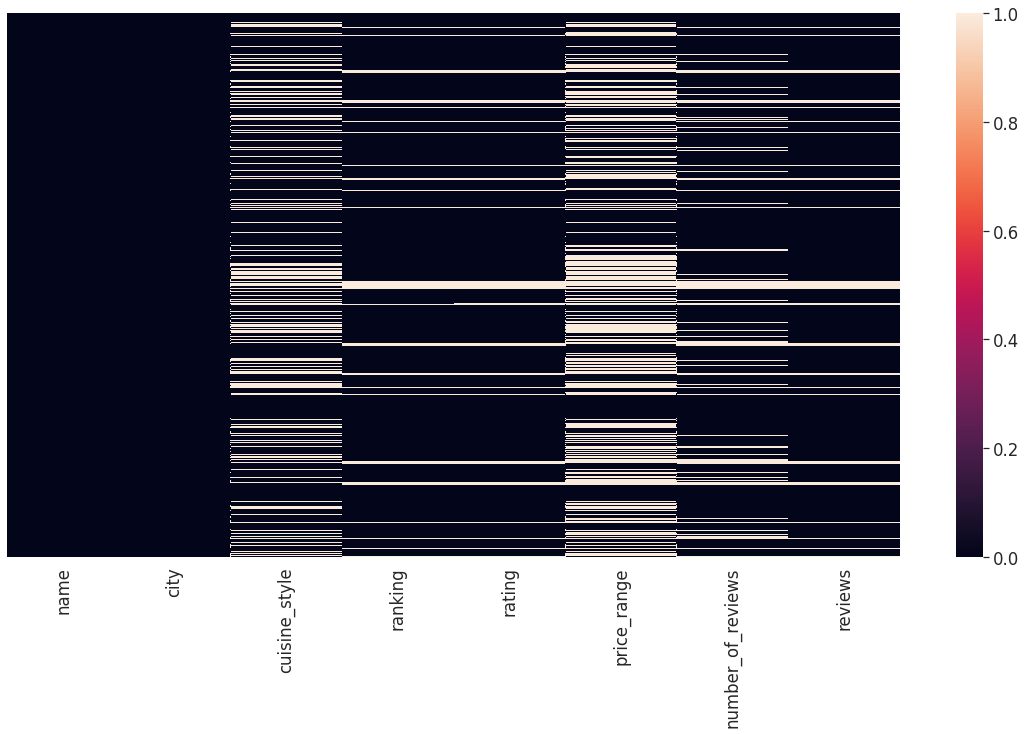

In [0]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)

**NUMBER OF RESTURANT PRESENT IN EACH CITY**

In [0]:
print(dataset.groupby('city')['name'].value_counts())
city_names=dataset.city.unique()


city       name           
Amsterdam  New York Pizza     15
           Bagels & Beans     11
           Febo                7
           Amsterdam           6
           Burger Bar          4
                              ..
Zurich     tibits Oerlikon     1
           tre fratelli        1
           vis-a-vis           1
           xenix - summer      1
           zaehringer cafe     1
Name: name, Length: 118020, dtype: int64


**RELATION BETWEEN RANKING AND RATING**

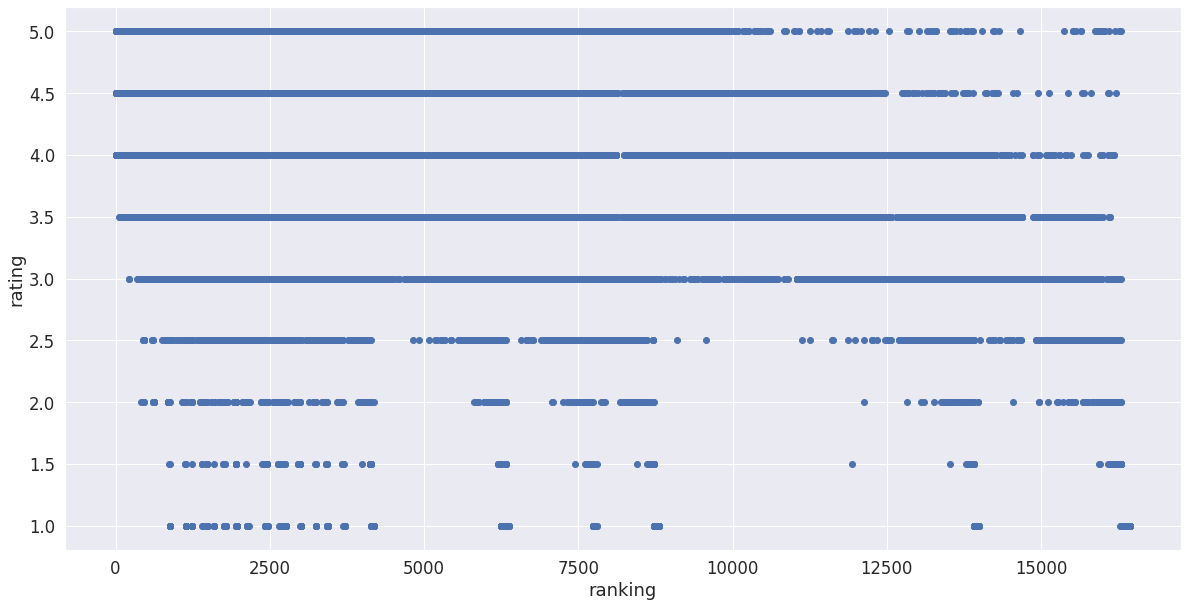

In [0]:
plt.scatter(dataset['ranking'],dataset['rating'])
plt.xlabel('ranking')
plt.ylabel('rating')
plt.show()
        

**RATING** **DISTRIBUTION**

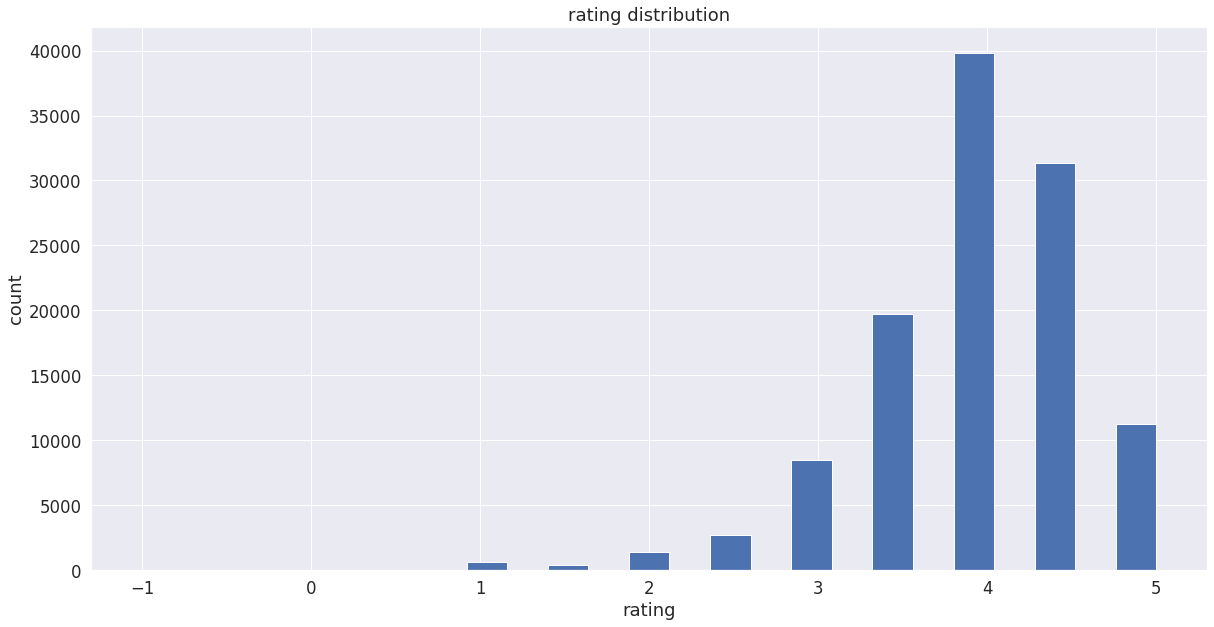

In [0]:
dataset['rating'].hist(bins=25)
plt.xlabel('rating')
plt.ylabel('count')
plt.title('rating distribution')
plt.show()
    

**RANKING DISTRIBUTION**

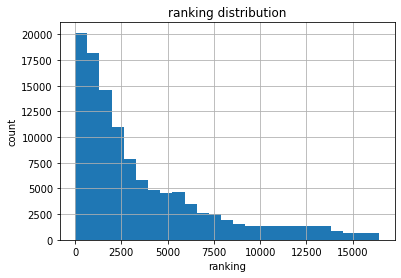

In [11]:
dataset['ranking'].hist(bins=25)
plt.xlabel('ranking')
plt.ylabel('count')
plt.title('ranking distribution')
plt.show()
    

**NUMBER OF** **RIVIEW** **DISTRIBUTION** 

2.0       5698
3.0       4687
4.0       3820
5.0       3388
6.0       2968
          ... 
1164.0       1
1768.0       1
2783.0       1
2677.0       1
1543.0       1
Name: number_of_reviews, Length: 2079, dtype: int64


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


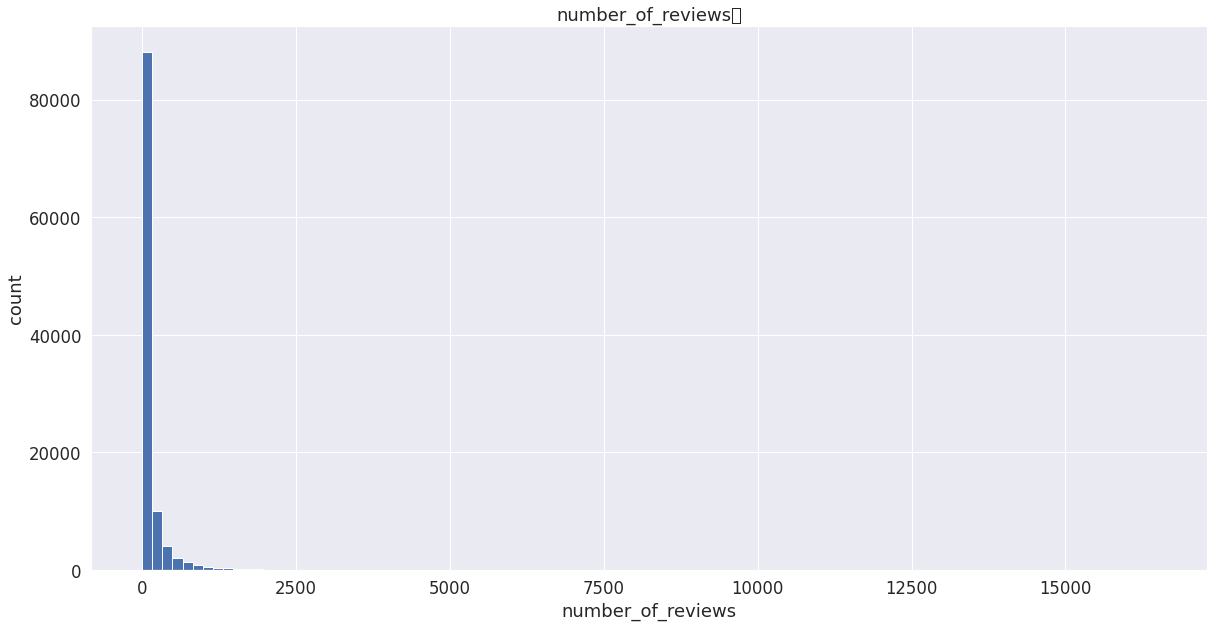

In [0]:
print(dataset['number_of_reviews'].value_counts())
dataset['number_of_reviews'].hist(bins=100)
plt.xlabel('number_of_reviews')
plt.ylabel('count')
plt.title('number_of_reviews	')
plt.show()


**NUMBER_OF_REVIEWS VS RANK**

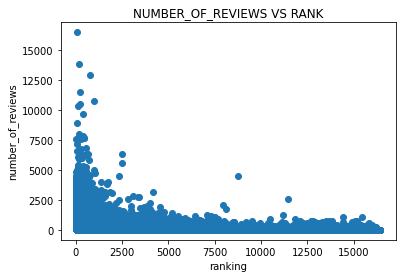

In [14]:
plt.scatter(dataset['ranking'],dataset['number_of_reviews'])
plt.xlabel('ranking')
plt.ylabel('number_of_reviews')
plt.title('NUMBER_OF_REVIEWS VS RANK')
plt.show()
        

**NUMBER OF REVIEWS VS RATING**

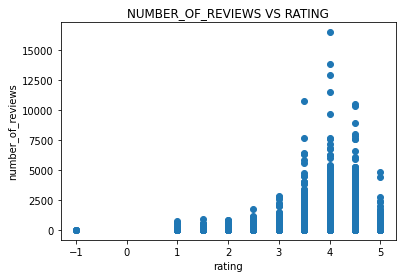

In [19]:
plt.scatter(dataset['rating'],dataset['number_of_reviews'])
plt.xlabel('rating')
plt.ylabel('number_of_reviews')
plt.title('NUMBER_OF_REVIEWS VS RATING')
plt.show()

**NORMAL RELATON BETWEEN RESTURANT NAME,CITY AND RATING**

In [21]:
dataset.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
!Bebop daslokal        5.0
Jwo Lekkernijen        5.0
K 35 Gastrobox         5.0
Taberna da Saudade     5.0
Taberna da Mouraria    5.0
Name: rating, dtype: float64

In [23]:
dataset.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
McDonald's        311
Burger King       170
Subway            123
Pizza Express      96
Domino's Pizza     83
Name: rating, dtype: int64

In [27]:
dataset.groupby('city')['number_of_reviews'].mean().sort_values(ascending=False).head()

city
Rome         293.895595
Edinburgh    235.803519
Milan        168.869551
Dublin       167.822270
Budapest     150.542396
Name: number_of_reviews, dtype: float64

**RESTURANT OUTLET IN INDIVISUAL CITY**

In [46]:
resturant_in_indiviual_city=dataset.groupby('city')['name'].value_counts()
city_dataset=pd.DataFrame(resturant_in_indiviual_city)
city_dataset

name
city      name                 
Amsterdam New York Pizza     15
          Bagels & Beans     11
          Febo                7
          Amsterdam           6
          Burger Bar          4
...                         ...
Zurich    tibits Oerlikon     1
          tre fratelli        1
          vis-a-vis           1
          xenix - summer      1
          zaehringer cafe     1

[118020 rows x 1 columns]